In [1]:
# !/usr/bin/python
# -*- coding: utf-8 -*-

from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def restore_image(cb, cluster, shape):
    row, col, dummy = shape
    image = np.empty((row, col, 3))
    index = 0
    for r in range(row):
        for c in range(col):
            image[r, c] = cb[cluster[index]]
            index += 1
    return image


def show_scatter(a):
    N = 10
    print '原始数据：\n', a
    density, edges = np.histogramdd(a, bins=[N,N,N], range=[(0,1), (0,1), (0,1)])
    density /= density.max()
    x = y = z = np.arange(N)
    d = np.meshgrid(x, y, z)

    fig = plt.figure(1, facecolor='w')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(d[1], d[0], d[2], c='r', s=100*density, marker='o', depthshade=True)
    ax.set_xlabel(u'红色分量')
    ax.set_ylabel(u'绿色分量')
    ax.set_zlabel(u'蓝色分量')
    plt.title(u'图像颜色三维频数分布', fontsize=20)

    plt.figure(2, facecolor='w')
    den = density[density > 0]
    den = np.sort(den)[::-1]
    t = np.arange(len(den))
    plt.plot(t, den, 'r-', t, den, 'go', lw=2)
    plt.title(u'图像颜色频数分布', fontsize=18)
    plt.grid(True)

    plt.show()

原始数据：
[[ 0.29411765  0.50588235  0.12941176]
 [ 0.30196078  0.51372549  0.1372549 ]
 [ 0.30588235  0.51764706  0.14117647]
 ..., 
 [ 0.09803922  0.35686275  0.01176471]
 [ 0.08627451  0.34117647  0.01176471]
 [ 0.07058824  0.3254902   0.        ]]


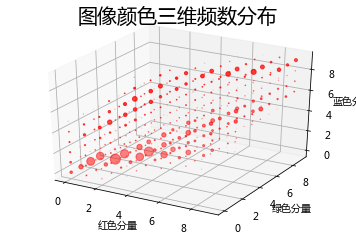

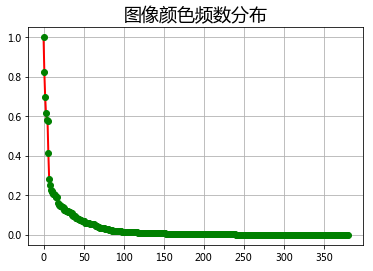

In [4]:
if __name__ == '__main__':
    # matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    # matplotlib.rcParams['axes.unicode_minus'] = False

    num_vq = 60
    im = Image.open('flower2.png')     # son.bmp(100)/flower2.png(200)/son.png(60)/lena.png(50)
    image = np.array(im).astype(np.float) / 255
    image = image[:, :, :3]
    image_v = image.reshape((-1, 3))
    model = KMeans(num_vq)
    show_scatter(image_v)

In [5]:
    N = image_v.shape[0]    # 图像像素总数
    # 选择足够多的样本(如1000个)，计算聚类中心
    idx = np.random.randint(0, N, size=1000)
    image_sample = image_v[idx]
    model.fit(image_sample)
    c = model.predict(image_v)  # 聚类结果
    print '聚类结果：\n', c
    print '聚类中心：\n', model.cluster_centers_

聚类结果：
[23 23 23 ..., 14 14 58]
聚类中心：
[[ 0.3379085   0.59852941  0.00604575]
 [ 0.42415686  0.27027451  0.82431373]
 [ 0.81532977  0.72976827  0.56114082]
 [ 0.18324421  0.24385027  0.02388592]
 [ 0.80174292  0.63166304  0.99055919]
 [ 0.59673203  0.56993464  0.34183007]
 [ 0.25714286  0.19103641  0.40448179]
 [ 0.21638655  0.42787115  0.08879552]
 [ 0.04208513  0.25212817  0.00248685]
 [ 0.38512508  0.58972279  0.22582826]
 [ 0.53501401  0.4280112   0.88907563]
 [ 0.88039216  0.8254902   0.98300654]
 [ 0.64183007  0.79887955  0.44780579]
 [ 0.3254902   0.20588235  0.60868347]
 [ 0.10839216  0.34603922  0.00588235]
 [ 0.02875817  0.02745098  0.01111111]
 [ 0.62058824  0.60294118  0.74852941]
 [ 0.55392157  0.71078431  0.12058824]
 [ 0.23372549  0.50021786  0.00522876]
 [ 0.40235294  0.45333333  0.48470588]
 [ 0.65490196  0.5837535   0.4442577 ]
 [ 0.3535014   0.20042017  0.73403361]
 [ 0.71455108  0.54076367  0.97750258]
 [ 0.27668845  0.50312273  0.12883079]
 [ 0.19509804  0.07189542  

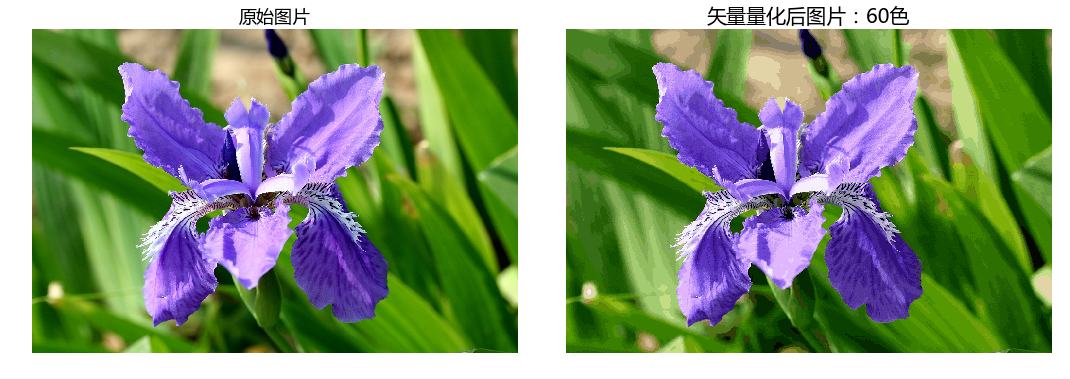

In [6]:
    plt.figure(figsize=(15, 8), facecolor='w')
    plt.subplot(121)
    plt.axis('off')
    plt.title(u'原始图片', fontsize=18)
    plt.imshow(image)
    # plt.savefig('1.png')

    plt.subplot(122)
    vq_image = restore_image(model.cluster_centers_, c, image.shape)
    plt.axis('off')
    plt.title(u'矢量量化后图片：%d色' % num_vq, fontsize=20)
    plt.imshow(vq_image)
    # plt.savefig('2.png')

    plt.tight_layout(1.2)
    plt.show()